In [ ]:
MOVIE RATING PREDICTION

In [ ]:
NAME: VANSH KAKKAR

In [ ]:
BATCH: AUGUST

In [ ]:
DATA SCIENCE INTERNSHIP

In [ ]:
AIM:
The Aim Of This Project Is To build A Model that Predicts The Movie Ratings.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [13]:
movie_data = pd.read_csv("IMDb_Movies_India.csv", encoding="latin1")
movie_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [17]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [19]:
movie_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [21]:
movie_data.isnull().sum()


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [23]:
movie_data.dropna(subset=["Rating"], inplace = True)
movie_data.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [25]:
movie_data.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace=True)
movie_data.isnull().sum()

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [29]:
# converting votes columns
movie_data['Votes'] = movie_data['Votes'].str.replace(',','').astype(int)

In [31]:
# converting year columns
movie_data['Year'] = movie_data['Year'].str.strip('()').astype(int)

In [33]:
# coverting duration columns
movie_data['Duration'] = movie_data['Duration'].str.strip('min')

In [35]:
movie_data.isnull().sum()

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [37]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int32  
 2   Duration  5659 non-null   object 
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int32  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(1), int32(2), object(7)
memory usage: 590.5+ KB


In [39]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [41]:
# Finding Top 11 Movies Based On Rating
top_movie = movie_data.loc[movie_data['Rating'].sort_values(ascending=False)[:11].index]
top_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,2020,NaN,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
12673,Secrets of Sinauli,2021,56,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
5125,God of gods,2019,90,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
8344,Love Sorries,2021,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi


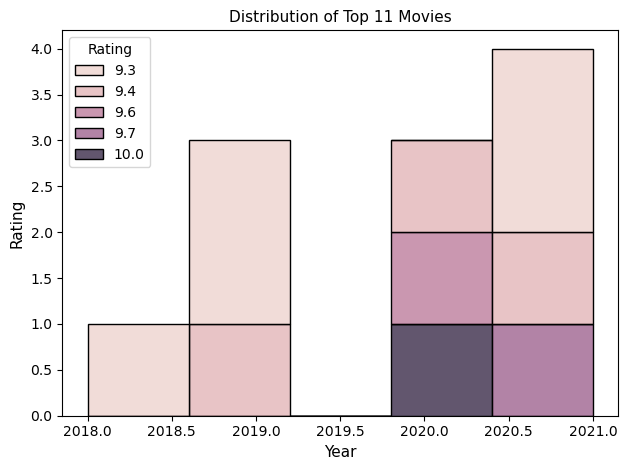

In [45]:
# Distribution Of Top 11 Movies according to Year
sns.histplot(data=top_movie, x="Year",hue="Rating", multiple="stack")
plt.title('Distribution of Top 11 Movies', fontsize=11)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Rating', fontsize=11)
plt.tight_layout()
plt.show()

In [47]:
# Distribution Of Genre Of Movies
genre_counts = movie_data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
top_n_genres = genre_counts.head(11)
top_n_genres

,Genre,Count
0,Drama,1137
1,"Drama, Romance",443
2,"Action, Crime, Drama",417
3,Action,391
4,"Drama, Family",291
5,"Action, Drama",270
6,Comedy,251
7,"Comedy, Drama",237
8,Romance,226
9,"Comedy, Drama, Romance",213


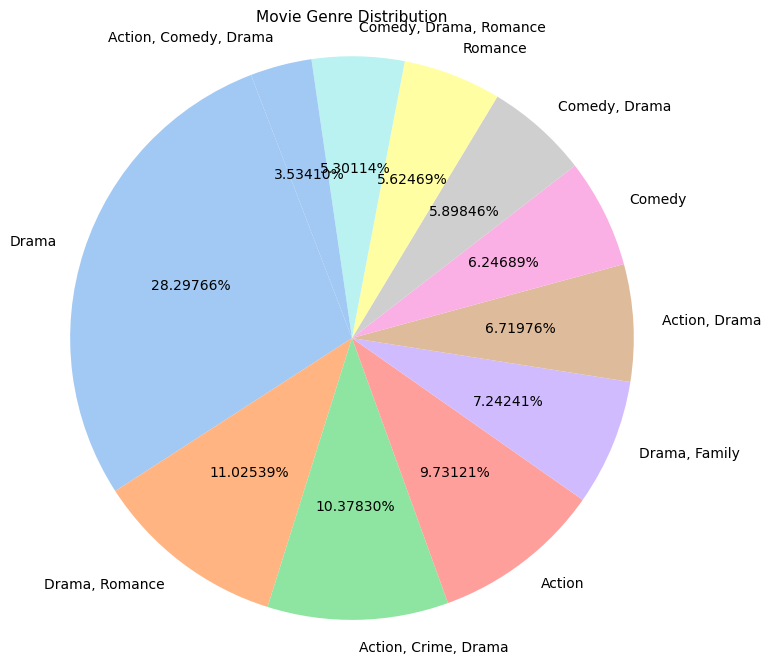

In [59]:
plt.figure(figsize=(8, 8))
plt.pie(top_n_genres['Count'], labels=top_n_genres['Genre'], autopct='%1.5f%%', startangle=111, colors=sns.color_palette('pastel'))
plt.title('Movie Genre Distribution', fontsize=11)
plt.axis('equal')
plt.show()

In [61]:
# Distribution Of Top 11 Directors By Average Rating
director_avg_rating = movie_data.groupby('Director')['Rating'].mean().reset_index()
director_avg_rating = director_avg_rating.sort_values(by='Rating', ascending=False)
top_directors = director_avg_rating.head(11)
top_directors

,Director,Rating
2243,Saif Ali Sayeed,10.0
2560,Sriram Raja,9.7
504,Bobby Kumar,9.6
322,Arvind Pratap,9.4
1513,Munni Pankaj,9.4
2598,Suhrud Godbole,9.4
1601,Nikhil Mahar,9.3
2809,Venkatesh Bk,9.3
1879,Rahul Mallick,9.3
1864,Raghav Jairath,9.3


C:\Users\VANSHU11\AppData\Local\Temp\ipykernel_7068\2013878539.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_directors, x='Rating', y='Director', palette='viridis')


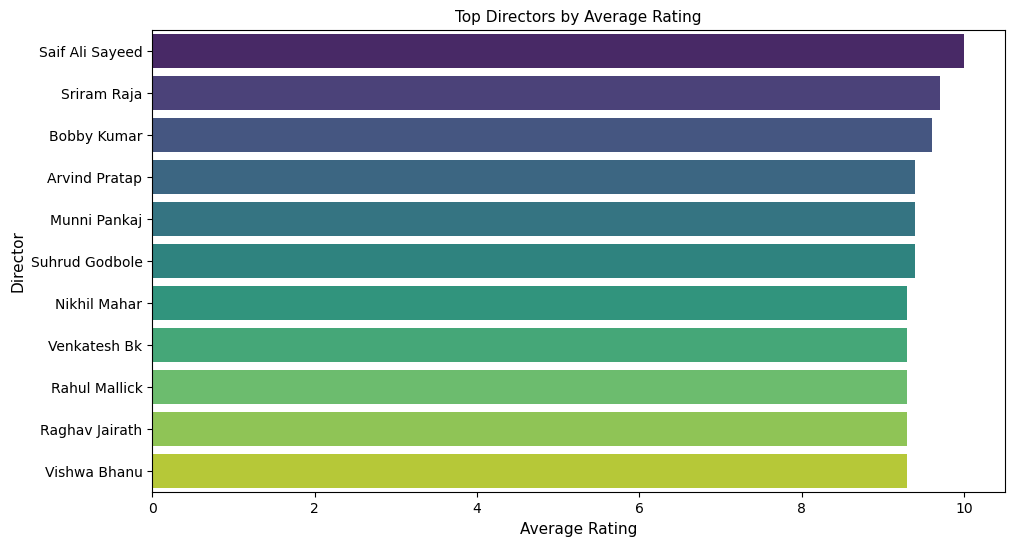

In [73]:
plt.figure(figsize=(11, 6))
sns.barplot(data=top_directors, x='Rating', y='Director', palette='viridis')
plt.title('Top Directors by Average Rating', fontsize=11)
plt.xlabel('Average Rating', fontsize=11)
plt.ylabel('Director', fontsize=11)
plt.show()
     

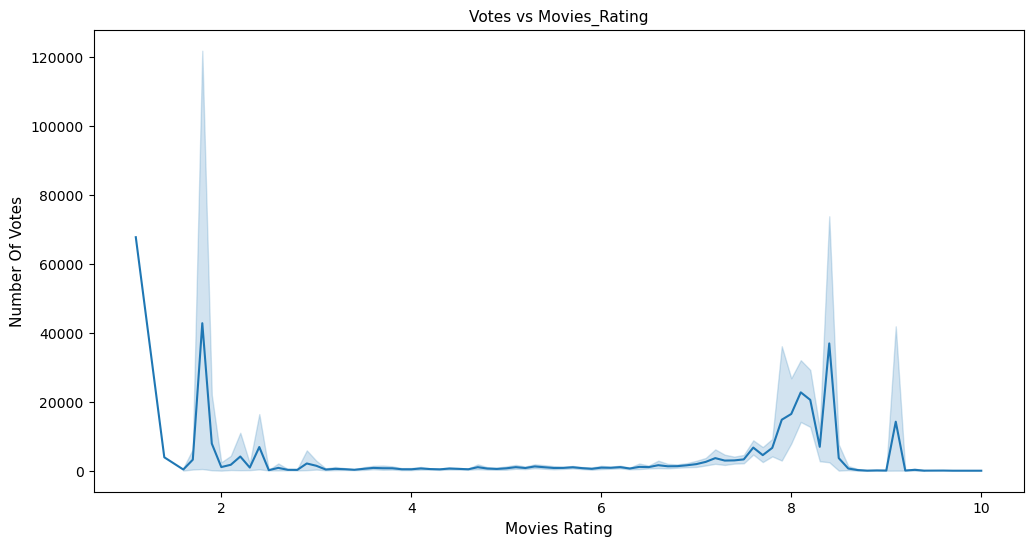

In [81]:
# Distribution Of Number Of Votes And Movie Rating
plt.figure(figsize=(12, 6))
sns.lineplot(data=movie_data, x='Rating', y='Votes')
plt.title('Votes vs Movies_Rating', fontsize=11)
plt.xlabel('Movies Rating', fontsize=11)
plt.ylabel('Number Of Votes', fontsize=11)
plt.show()

In [85]:
# Distribution Of Top 11 Actors By Number Of Movies
actor_counts = movie_data['Actor 1'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'Number_Of_Movies']
top_n_actors = actor_counts.head(11)
top_n_actors

,Actor,Number_Of_Movies
0,Jeetendra,140
1,Dharmendra,134
2,Mithun Chakraborty,130
3,Ashok Kumar,125
4,Rajesh Khanna,118
5,Amitabh Bachchan,116
6,Dev Anand,90
7,Shashi Kapoor,88
8,Akshay Kumar,82
9,Sanjay Dutt,73


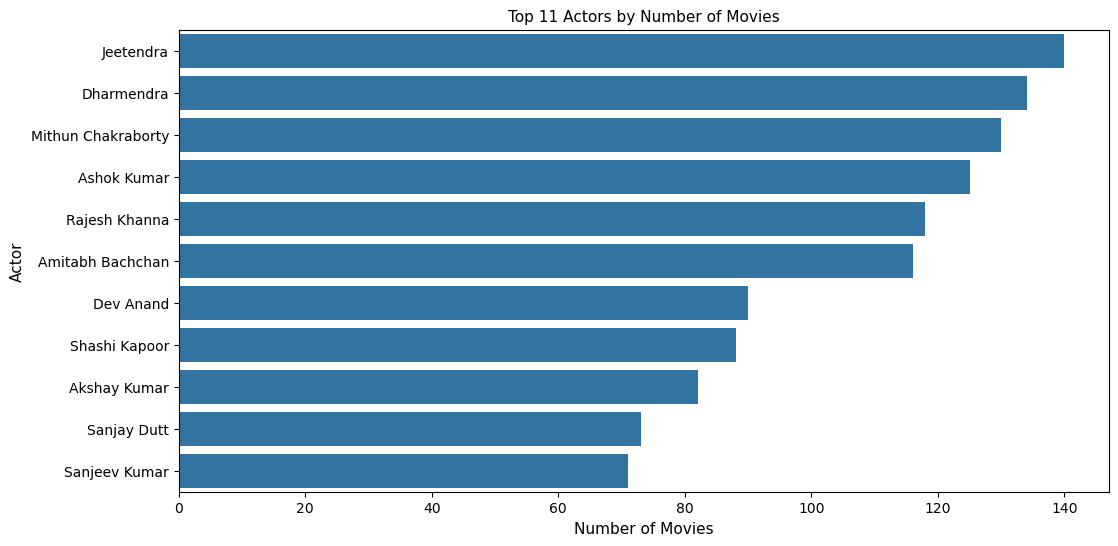

In [87]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_actors, x='Number_Of_Movies', y='Actor', orient='h')
plt.title('Top 11 Actors by Number of Movies', fontsize=11)
plt.xlabel('Number of Movies', fontsize=11)
plt.ylabel('Actor', fontsize=11)
plt.show()

In [95]:
# Distribution Of Movies With Rating Greater Than 8 And Votes Greater Than 11000
filtered_df = movie_data[(movie_data['Rating'] > 8) & (movie_data['Votes'] > 11000)]
filtered_df.head(11)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
75,3 Idiots,2009,170,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
173,A Wednesday,2008,104,"Action, Crime, Drama",8.1,75118,Neeraj Pandey,Anupam Kher,Naseeruddin Shah,Jimmy Sheirgill
981,Anand,1971,122,"Drama, Musical",8.3,31937,Hrishikesh Mukherjee,Rajesh Khanna,Amitabh Bachchan,Sumita Sanyal
1009,Andaz Apna Apna,1994,160,"Action, Comedy, Romance",8.1,50810,Rajkumar Santoshi,Aamir Khan,Salman Khan,Raveena Tandon
1019,Andhadhun,2018,139,"Crime, Drama, Music",8.2,77901,Sriram Raghavan,Ayushmann Khurrana,Tabu,Radhika Apte
1285,Article 15,2019,130,"Crime, Drama, Mystery",8.2,25706,Anubhav Sinha,Ayushmann Khurrana,Nassar,Manoj Pahwa
1877,Barfi!,2012,151,"Comedy, Drama, Romance",8.1,77377,Anurag Basu,Ranbir Kapoor,Priyanka Chopra Jonas,Ileana D'Cruz
2065,Bhaag Milkha Bhaag,2013,186,"Biography, Drama, Sport",8.2,62636,Rakeysh Omprakash Mehra,Farhan Akhtar,Sonam Kapoor,Pawan Malhotra
2412,Black,2005,122,Drama,8.2,33782,Sanjay Leela Bhansali,Amitabh Bachchan,Rani Mukerji,Shernaz Patel
2425,Black Friday,2004,143,"Action, Crime, Drama",8.5,19493,Anurag Kashyap,Kay Kay Menon,Pawan Malhotra,Aditya Srivastav


C:\Users\VANSHU11\AppData\Local\Temp\ipykernel_7068\586033471.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha='right')


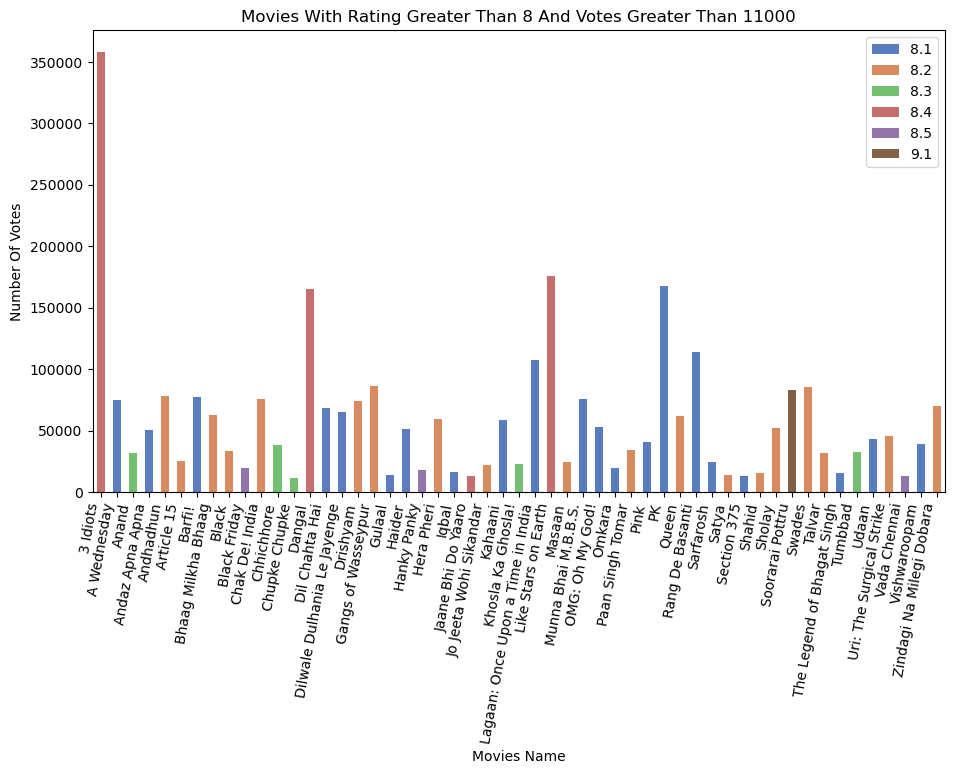

In [107]:
plt.figure(figsize=(11, 6))
ax=sns.barplot(data=filtered_df,x='Name',y='Votes',hue='Rating',dodge=False,width=0.5,palette='muted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha='right')
ax.legend(loc='upper right')
ax.set_xlabel('Movies Name')
ax.set_ylabel('Number Of Votes')
ax.set_title('Movies With Rating Greater Than 8 And Votes Greater Than 11000')
plt.show()

In [111]:
# Distribution Of Movies Genre
movie_data['Genre'] = movie_data['Genre'].str.split(',')
genre_df = movie_data.explode('Genre')
genre_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


C:\Users\VANSHU11\AppData\Local\Temp\ipykernel_7068\1024269266.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index, palette='viridis')


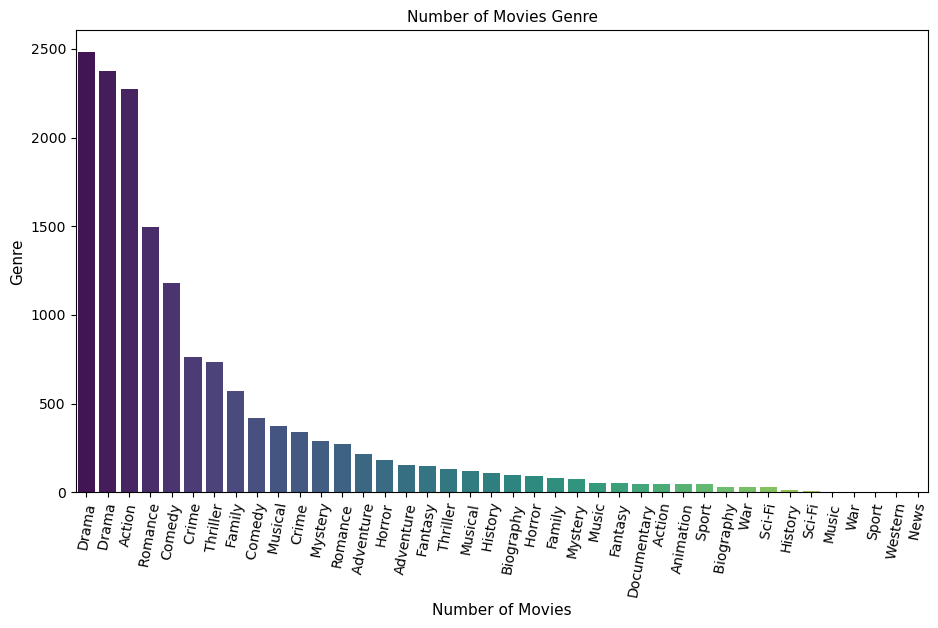

In [113]:
plt.figure(figsize=(11, 6))
sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index, palette='viridis')
plt.title('Number of Movies Genre', fontsize=11)
plt.xlabel('Number of Movies', fontsize=11)
plt.ylabel('Genre', fontsize=11)
plt.xticks(rotation=80)
plt.show()

C:\Users\VANSHU11\AppData\Local\Temp\ipykernel_7068\1113961525.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_rating_by_genre,y="Rating",x='Genre',palette='coolwarm')


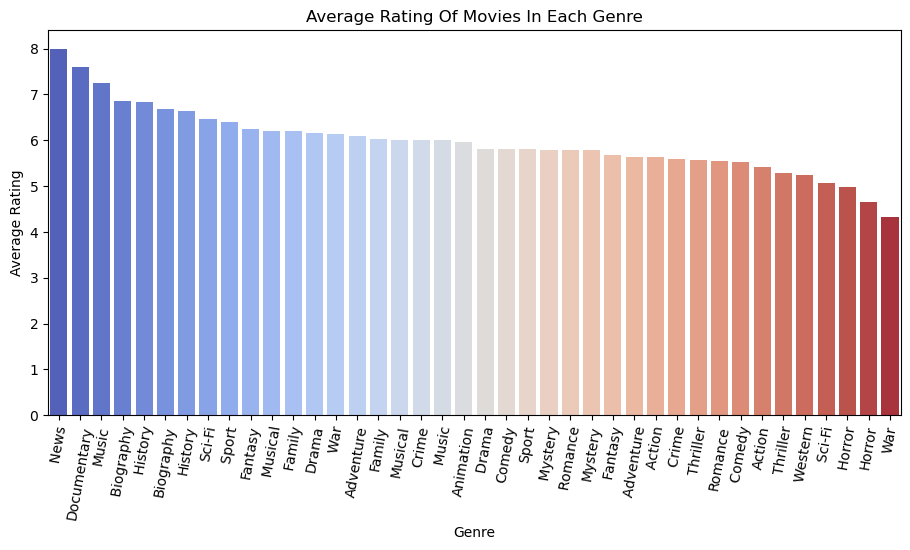

In [115]:
# Distribution Of Average Rating Of Movies In Each Genre
average_rating_by_genre = genre_df.groupby('Genre')['Rating'].mean().reset_index()
average_rating_by_genre = average_rating_by_genre.sort_values(by='Rating', ascending=False)
plt.figure(figsize=(11,5))
sns.barplot(data=average_rating_by_genre,y="Rating",x='Genre',palette='coolwarm')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating Of Movies In Each Genre')
plt.xticks(rotation=80)
plt.show()

In [117]:
top_movie = movie_data.loc[movie_data['Rating'].sort_values(ascending=False)[:11].index]
top_movie
     

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,"[Drama, Romance]",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79,"[Music, Romance]",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,2020,NaN,[Drama],9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
14222,The Reluctant Crime,2020,113,[Drama],9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,2019,105,"[History, Romance]",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
6852,June,2021,93,[Drama],9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
12673,Secrets of Sinauli,2021,56,"[Documentary, History]",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
5125,God of gods,2019,90,[Documentary],9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
8344,Love Sorries,2021,101,"[Comedy, Drama, Romance]",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
1314,Ashok Vatika,2018,97,[Drama],9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
